# Final Project
### Halina Vercessi-Clarke and Hannah Nguyen

In [1]:
#importing the libraries
import os 
import cv2
import numpy as np
from skimage import io
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from data_utils import sigmoid


#importing scikit learning modules
from sklearn.model_selection import train_test_split


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [2]:

# file_path = 'C:/Users/Halina/Documents/GitHub/Fashion-throughout-the-Years/images'
file_path = os.getcwd() + '\images2'
data = [] 
labels = []
i = 0
label_names = os.listdir(file_path)
classes = []
for root, dirs, files in os.walk(file_path):
    path = str(root).replace(str(chr(92)), "/")
    if (path.split("/")[-1]!='images2'):
        classes.append([label_names[i].split(" ")[0]])
        for img in os.listdir(path):
            pic = cv2.imread(os.path.join(path,img))
            pic = cv2.resize(pic,(80,80))
            
            data.append(pic)
            
            labels.append([i])
        i+=1
        

In [3]:
print(len(classes))
classes

18


[['1820'],
 ['1830'],
 ['1840'],
 ['1850'],
 ['1860'],
 ['1870'],
 ['1880'],
 ['1890'],
 ['1900'],
 ['1910'],
 ['1920'],
 ['1930'],
 ['1940'],
 ['1950'],
 ['1955'],
 ['1960'],
 ['1965'],
 ['1970']]

In [4]:
print(len(labels))


595


In [5]:
data = np.asarray(data)
labels = np.asarray(labels)
#print(data[344])
#print(labels[344])
#data[0].flatten()

In [6]:
print(data.shape)
#plt.imshow(saved[0].reshape(80,80,3))
#data[344]

(595, 80, 80, 3)


In [7]:
def one_hot():
        
    # length of vector
    depth = len(classes)

    x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = .2) 
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = .25)
    
    ytrain_1hot  = tf.keras.utils.to_categorical(y_train, num_classes=depth)  
    yval_1hot  = tf.keras.utils.to_categorical(y_val, num_classes=depth)  
    ytest_1hot  = tf.keras.utils.to_categorical(y_test, num_classes=depth)
    
    x_train = x_train / 255
    x_val = x_val / 255
    x_test = x_test / 255
    
    return (x_train, x_val, x_test, ytrain_1hot, yval_1hot, ytest_1hot)

In [8]:
xtrain, xval, xtest, ytrain_1hot, yval_1hot, ytest_1hot = one_hot()

In [9]:
xtrain.shape, ytrain_1hot.shape

((357, 80, 80, 3), (357, 18))

In [10]:
xtest.shape, ytest_1hot.shape

((119, 80, 80, 3), (119, 18))

In [11]:
xval.shape, yval_1hot.shape

((119, 80, 80, 3), (119, 18))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


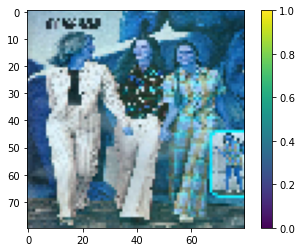

In [12]:
print(ytrain_1hot[0])
plt.figure()
plt.imshow(xtrain[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
model = tf.keras.Sequential(
    [
        layers.Conv2D(3, 1, activation='relu', input_shape=(80, 80, 3)),
        layers.Reshape((80, 80, 3)),
        
        layers.Conv2D(32, 7, activation='relu', strides=(2, 2), padding='valid'),
        
        layers.Conv2D(64, 3, activation='relu', strides=(1, 2), padding='valid'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(50, activation="relu"),
        layers.Dense(18, activation='softmax')
    ]
)

lr_sch = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=.01,
                decay_steps= 500,
                decay_rate=0.99)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_sch), 
              loss='categorical_crossentropy', 
              metrics = ['accuracy'] )


In [20]:
hist = model.fit(xtest, ytest_1hot,
          validation_data = (xval, yval_1hot),
          batch_size = 1, 
          epochs = 15 
          )

# test_loss, test_acc = model.evaluate(xtest,  ytest_1hot, batch_size = 1)
# val_loss, val_acc = model.evaluate(xval,  yval_1hot, batch_size = 1)

# print('\nTest accuracy:', test_acc)
# print('\nVal accuracy:', val_acc)

Epoch 1/15
119/119 [==============================] - 3s 24ms/step - loss: 3.6185 - accuracy: 0.2005 - val_loss: 2.7295 - val_accuracy: 0.0924
Epoch 2/15
119/119 [==============================] - 3s 24ms/step - loss: 2.6799 - accuracy: 0.1804 - val_loss: 2.7463 - val_accuracy: 0.0924
Epoch 3/15
119/119 [==============================] - 3s 24ms/step - loss: 2.6561 - accuracy: 0.1871 - val_loss: 2.7580 - val_accuracy: 0.0924
Epoch 4/15
119/119 [==============================] - 3s 25ms/step - loss: 2.5875 - accuracy: 0.2257 - val_loss: 2.7630 - val_accuracy: 0.0924
Epoch 5/15
119/119 [==============================] - 3s 25ms/step - loss: 2.5920 - accuracy: 0.1764 - val_loss: 2.7500 - val_accuracy: 0.0924
Epoch 6/15
119/119 [==============================] - 3s 24ms/step - loss: 2.6957 - accuracy: 0.1340 - val_loss: 2.7768 - val_accuracy: 0.0924
Epoch 7/15
119/119 [==============================] - 3s 24ms/step - loss: 2.5430 - accuracy: 0.2181 - val_loss: 2.7637 - val_accuracy: 0.0924

In [18]:
hist.history['accuracy']

[0.1596638709306717,
 0.18487395346164703,
 0.18487395346164703,
 0.18487395346164703,
 0.18487395346164703,
 0.18487395346164703,
 0.18487395346164703,
 0.1596638709306717,
 0.18487395346164703,
 0.18487395346164703,
 0.18487395346164703,
 0.18487395346164703,
 0.18487395346164703,
 0.18487395346164703,
 0.18487395346164703]

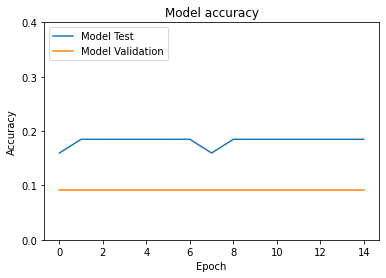

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.yticks(np.arange(0, .5, .1))
plt.legend(['Model Test', 'Model Validation'], loc='upper left')
plt.show()